## Description

### Background & Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.





## Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.    
  
 
**Clustering Algorithm**  
A cluster is a collection of data points that have a similarity to each other based on a predetermined measure of distance. The purpose of using a clustering algorithm is to is to segment data points and automatically organize them in groups. 

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).



### Data Dictionary

* `Sl_No`: Primary key of the records
* `Customer Key`: Customer identification number
* `Average Credit Limit`: Average credit limit of each customer for all credit cards
* `Total credit cards`: Total number of credit cards possessed by the customer
* `Total visits bank`: Total number of visits that customer made (yearly) personally to the bank
* `Total visits online`: Total number of visits or online logins made by the customer (yearly)
* `Total calls made`: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Environment Setup

### Import Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Data scaling libraries
from sklearn.preprocessing import StandardScaler # uses the z-score transformation as default method
from scipy.stats import zscore

# Computes distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# Kmeans clustering library and scoring
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualizes the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

### Read the Data

In [2]:
# I use Google CoLab so this links to my person Google Drive for the course
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Changes the directory to the folder for the Linear Regression folder in my Google Drive
%cd /content/drive/My\ Drive/UT\ AIML/Unsupervised\ Learning/ 

/content/drive/My Drive/UT AIML/Unsupervised Learning


In [4]:
# Imports the Cars4U Dataset 
df = pd.read_excel('Credit Card Customer Data.xlsx')

In [5]:
# Creates a copy of the dataframe to preserve the original format
df_copy = df.copy()

## Exploratory Data Analysis and Insights

### Data Overview

In [ ]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [ ]:
df.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [6]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 660 rows and 7 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* All the variables are numeric and the datatypes can be changed from int64 to int16 to reduce the amount of memory the dataframe uses and speed up the processing time for algorithms. The `SL_No` and `Customer Key` columns can be dropped since they are identying numbers and do not add meaningful information for the algorithms. 

In [ ]:
# Check the total count of duplicate rows
df.duplicated().sum()

0

* There are no duplicate values in the dataset. 

In [ ]:
# Drops the Sl_No and Customer Key since they don't contribute any meaningful information
df.drop(['Sl_No', 'Customer Key'],axis=1,inplace=True)

In [ ]:
# Displays the null values in the form of a percentage for each feature
print(df.isna().mean().round(4) * 100)

Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made       0.0
dtype: float64


* There are no missing values in the dataset.

In [ ]:
# Includes all the features and transposes the view
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


* `Avg_Credit_Limit` : The mean is much greater than the median which indicates a heavily right skewed distribution.
* `Total_Credit_Cards` : The mean is a little lower than the median which suggests a slightly left skewed distribution. 
* `Total_visits_bank` : The distribution looks normal based on how close the mean and median and how even the counts look across the quartiles. 
* `Total_visits_online`: The distribution appears to have a right skew with some outliers far to the right of the mean and median. 
* `Total_calls_made` : The distribution looks to be right skewed with outliers to the right of the mean and median based on the range from teh minimum and maximum.


### Univariate Analysis

In [ ]:
# Function to add a boxplot on top of a histogram 

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

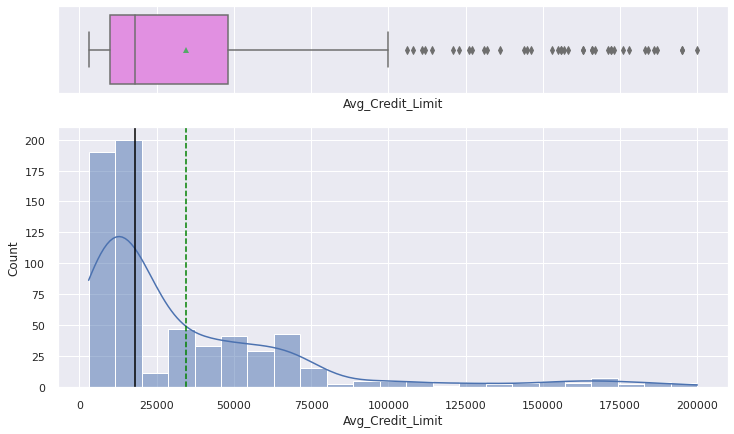

In [ ]:
histogram_boxplot(df, 'Avg_Credit_Limit', kde=True)

* The dsitribution is very heavily right skewed with many ourliers to the right of mean. These outliers may need to be treated, but it may be more valuable to keep the outliers since there may be valuable information avaialble for the clustering algorithms.

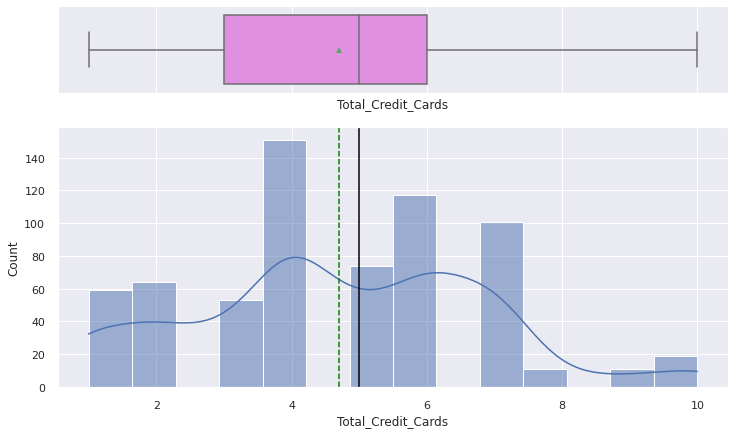

In [ ]:
histogram_boxplot(df, 'Total_Credit_Cards', kde=True)

* The disribution is bimodal, but it may change after scaling to appear more uniform. 

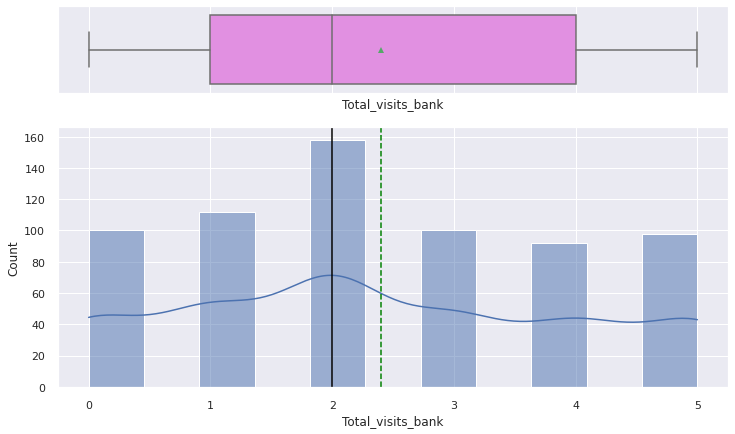

In [ ]:
histogram_boxplot(df, 'Total_visits_bank', kde=True)

* The distribution is slightly right skewed, but overall it's relatively normal.

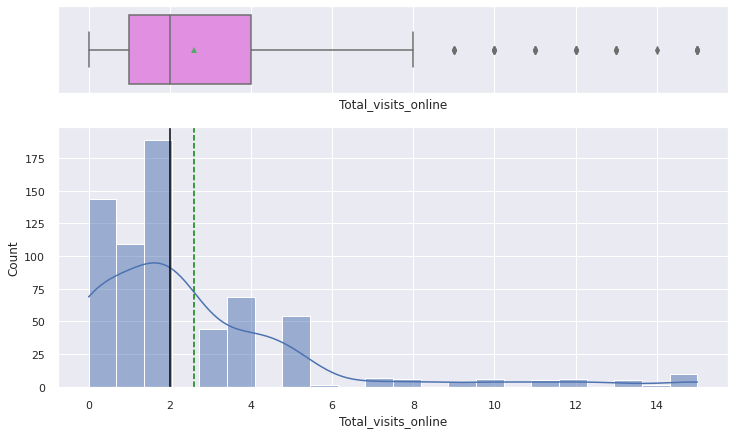

In [ ]:
histogram_boxplot(df, 'Total_visits_online', kde=True)

* There are several outliers to the right of the mean and median, but these may also create a separate segment after clustering and provide helpful information. 

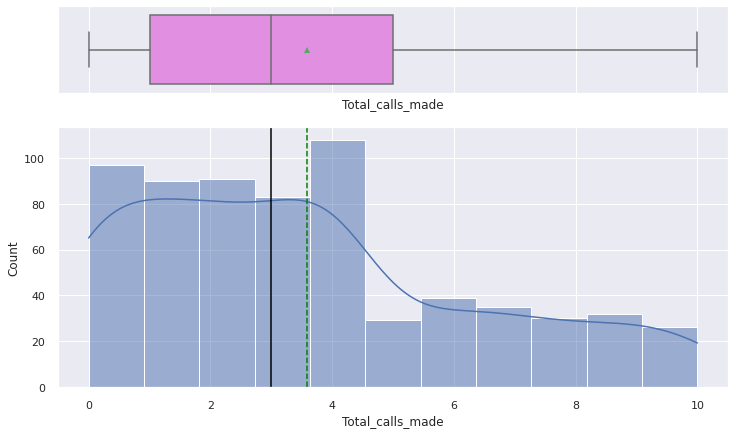

In [ ]:
histogram_boxplot(df, 'Total_calls_made', kde=True)

* The distribution is right skewed and may become normalized after scaling.

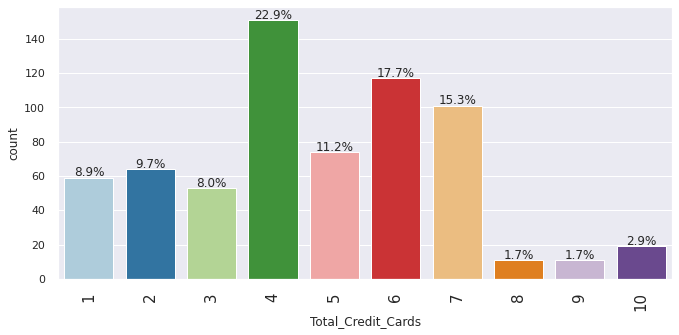

In [ ]:
labeled_barplot(df, 'Total_Credit_Cards', perc=True)

* The majority of customers have 4 credit cards (22.9%), followed by 6 credit cards (17.7%), then 7 credit cards (15.3%). 

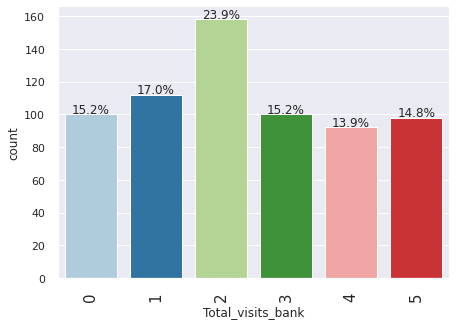

In [ ]:
labeled_barplot(df, 'Total_visits_bank', perc=True)

* The percentages are fairly close among the visits, but 2 visits is most represented (23.9%) with the other number of visits categories ranging from 13.9%-17%.

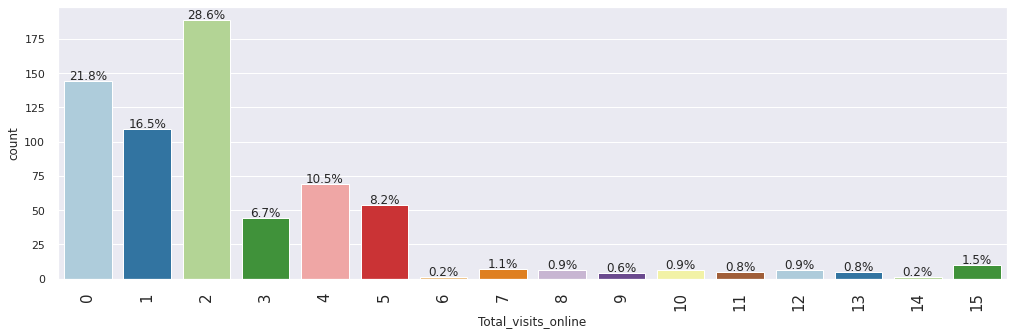

In [ ]:
labeled_barplot(df, 'Total_visits_online', perc=True)

* The majority of the online visits range from 0 to 5 which accounts for 92.3% of all number of visits, with 2 visits having the largest portion (28.6%) followed by 0 visits (21.8%). 

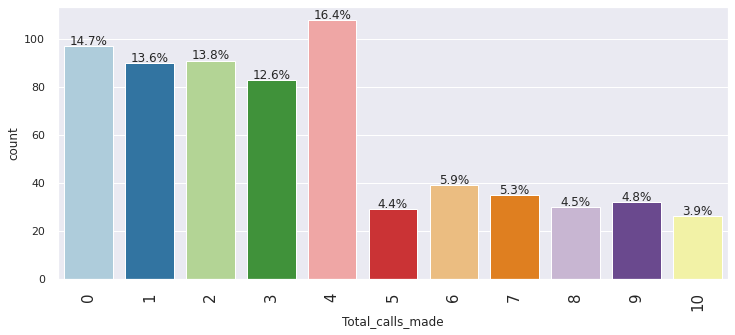

In [ ]:
labeled_barplot(df, 'Total_calls_made', perc=True)

* The largest portion of customers make calls to the bank ranging from 0 to 4, which represents 71.1%, the most among those who make 4 phone calls (16.4%). 

### Bivariate Analysis

In [ ]:
df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


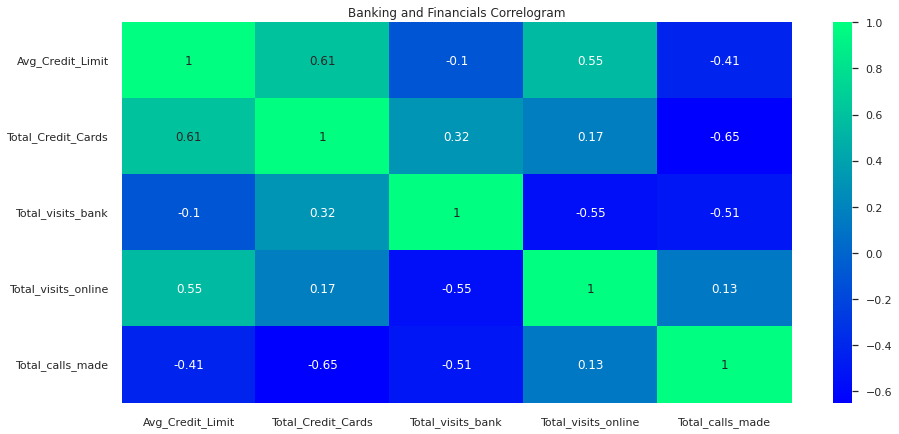

In [ ]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.heatmap(df.corr(), annot=True, cmap='winter')
plt.title('Banking and Financials Correlogram')
plt.show()

* `Avg_Credit_Limit` to `Total_Credit_Cards` : The credit limit and number of cards has a high positive correlation which makes perfect sense because the more cards someone has, the more credit they are likely to have available.
* `Avg_Credit_Limit` to `Total_visits_online` : The number of online visits and credit limit are relatively highly correlated which will be ineresting to explore after clustering.
* `Avg_Credit_Limit` to `Total_calls_made` : There is a noticeably negative correlation between credit limit and calls, which is interesting since this indicates the higher the credit limit the fewer times a customer will call the bank. 
* `Total_Credit_Cards` to `Total_calls_made` : There is also a high negative correlation between the number of credit cards a customer has with the number of calls a customer makes to the bank. 
* `Total_visits_bank` to `Total_Credit_Cards` : The number of bank visits has a negative relationship with the number of cards a customer holds, which means that as the number of visitis increase for a customer the number of cards they have tends to be fewer. 
* `Total_visits_bank` to `Total_visits_online` : There is a noticeable negative correlation between bank visits and online visits which makes a lot of sense as a customer who uses online tools is less likely to require help from a physical banker or teller.
* `Total_visits_bank` to `Total_calls_made` : The number of calls and bank visits are also negatively corrrelated which also makes sense as the online vister since their issues are likely resolved through a different medium over being in-person. 

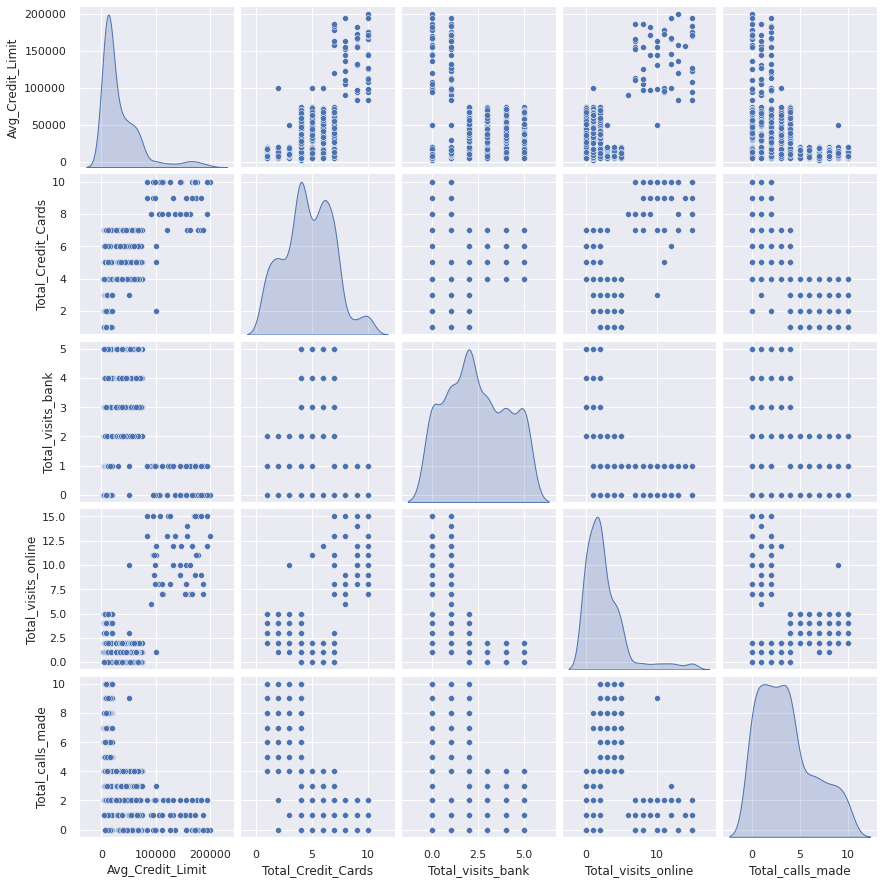

In [ ]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

## Data Preprocessing

### Outlier Treatment

As mentioned, the outliers may be useful in that they could represent unique customer segments, therfore I'll leave them in. Additionally, the outliers will simulate for real-world data.  

### Data Scaling

The data must be scaled before the clustering algorithms are applied to smooth the data and prevent bias or heavy weighting towards the variables that have a higher or lower range.  

- To scale the data, we can apply a z-score transformation which sets the mean to 0 and the standard deviation to 1 for all the variables. 

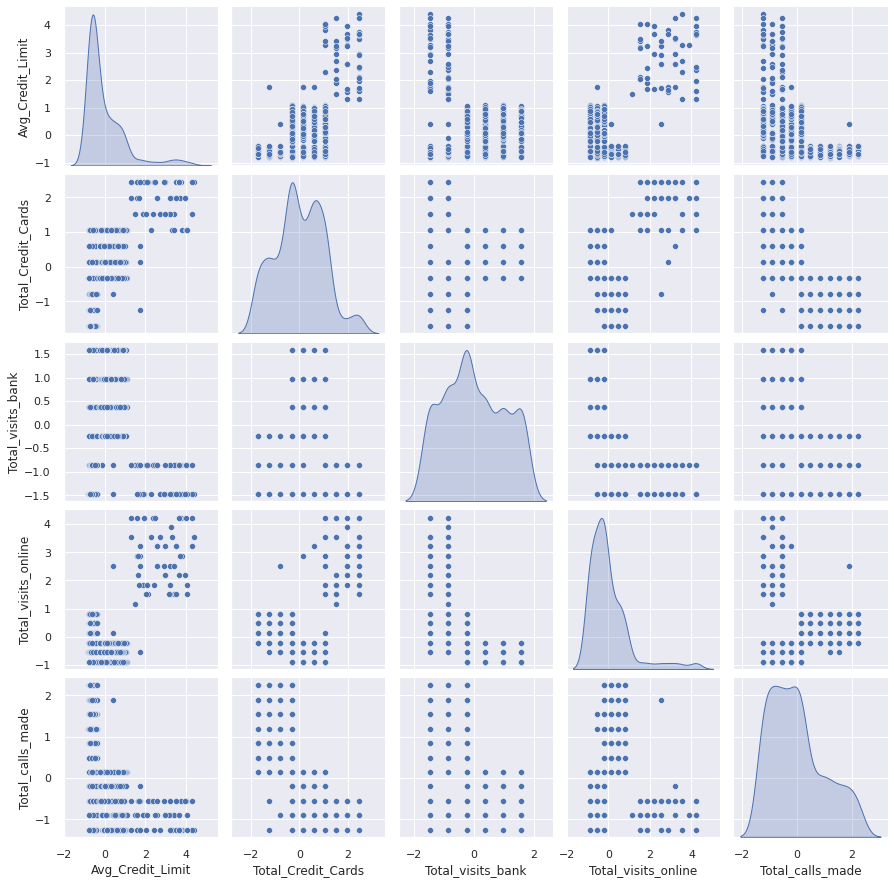

In [ ]:
# Scale with z score
dfScaled=df.apply(zscore)
dfScaled2=df.apply(zscore)
sns.pairplot(dfScaled,diag_kind='kde')

## Model Evaluation Criteria

* We'll look at the siloheutte scores to compare the clustering techniques and cophenetic correlation values to find the most mathematically sound technique. Addiitonally, we'll rely on the exploratory data analysis to help inform the results of the clustering results and find meaning in how the customers are segmented.  


## K-Means Clustering

### Elbow Curves

* Since the value of k (number of clusters) is unknown, elbow curves are the most common way to determine the the optimal k of clusters. The logic for this method works based on the point of dimisnhing returns which means that at some poin when the number fo clusters are increased, the the actual performance diminishes. The x-axis indicates the number of clusters while the y-axis indicates the "average distortion," or variability in the explained by the clusters. 




Text(0.5, 1.0, 'Selecting k with the Elbow Method')

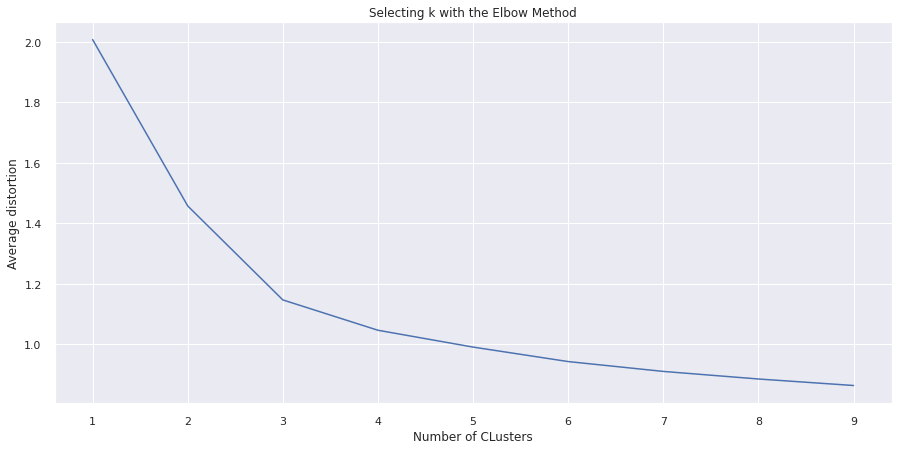

In [ ]:
# Finding optimal number of clusters using an elbow curve
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('Number of CLusters')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


* From looking at the elbow curve we can conclude that the optimal number of clusters is likely 3 or 4 because the bend or "elbow" in the curve occurs in those locations. 

### Silhouette Scores

* Silhouette scores are a metric that indicates how well a clustering algorithm is fitting to the data. The values range from -1 to 1 where 1 indicates tight, well formed clusters, 0 represents clusters that are not separated well, and -1 represents data points that are in the wrong cluster altogether. 

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.25583657571102003
For n_clusters = 7, silhouette score is 0.24820989931527374
For n_clusters = 8, silhouette score is 0.2472880584719673
For n_clusters = 9, silhouette score is 0.22286505769574325


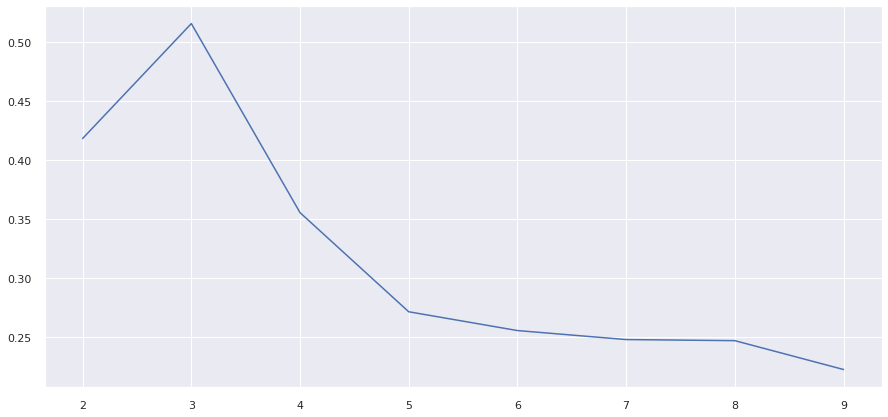

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((dfScaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(dfScaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* The highest silohuette score (0.5157) is with 3 clusters which reinforces the findings from the elbow curve. 

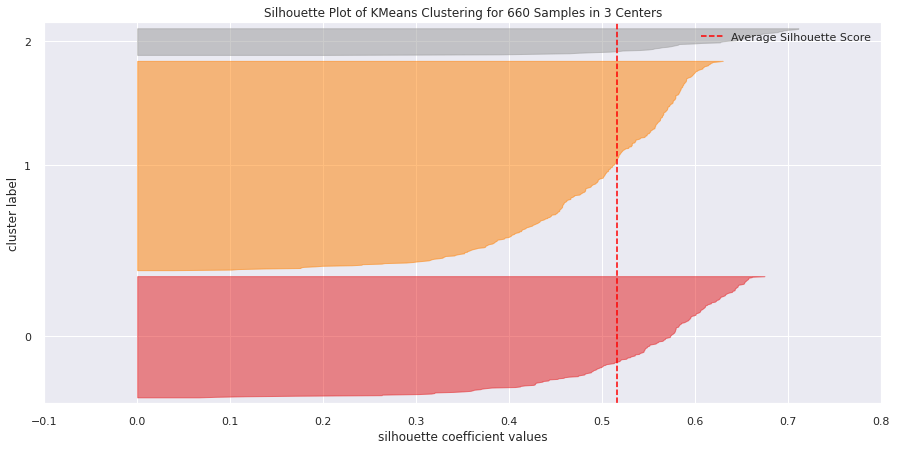

In [ ]:
# Visualizing silohuette coefficients 
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(dfScaled)
visualizer.show()

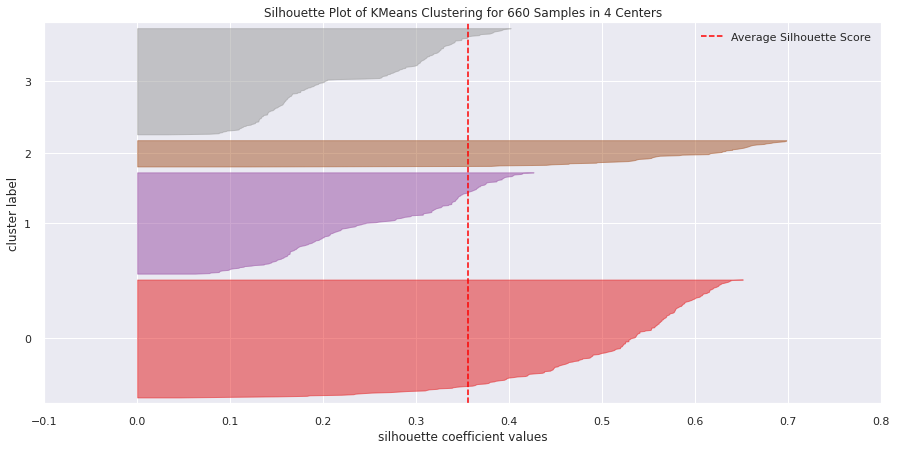

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(dfScaled)
visualizer.show()

* The visualizations of the silohuette scores shows that the average coefficients are higher for the cluster of 3 over the 4 clusters. The horizontal area charts also visuaize less variability among a 3 cluster system over a 4 cluster selection since the peaks are more consistant across the individual clusters. 

### Apply K-Means and Append the Segments

 Since the 3 clusters show a higher silohuette score and less variability, we'll use 3 clusters for segmentation and explore the results of the clustering algorithm and infer what this means for the bank's customers.

In [ ]:
# K-means where k = 3
final_model=KMeans(3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

# Append the prediction 
dfScaled["Segment"] = prediction
dfScaled["Segment"] = prediction
print("Segment Assigned : \n")
dfScaled.head()

Segment Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Segment
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


### Cluster Profiling 

In [ ]:
cluster_profile = dfScaled.groupby("Segment").mean()

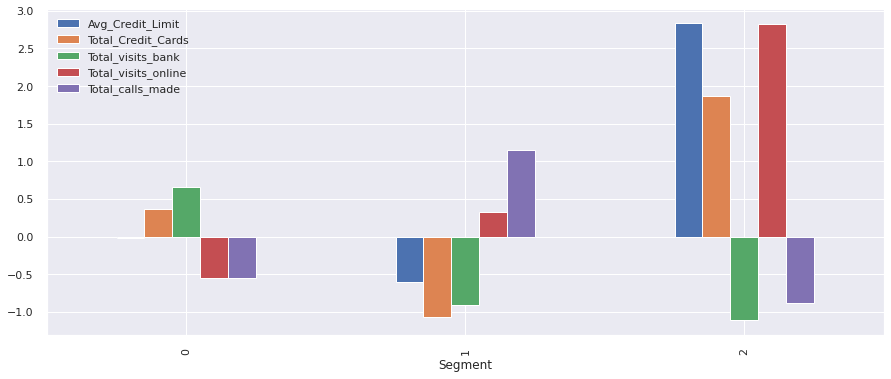

In [ ]:
dfScaled.groupby("Segment").mean().plot.bar(figsize=(15, 6))

* `0 Segment`: Customer segment 0 has the lowest average credit limit and yet shows there is a positive amount of average number of credit cards and bank visits. Additonally, they make fewer calls and online visits.
* `1 Segment`: This segment has lower average credit limits, fewer cards, and makes fewer visits to the bank. However, they tend to have slightly more online vists and far more calls to the bank.    
* `2 Segment`: The last segment has higher average credit limits, more cards, and far more online usage than the other segments. It also has much fewer bank visits and calls made.  

## Hierarchical Clustering

Next, we'll use the hierarchical clustering alrgorithm to see if it produces a more statistically pure clusters. Then, we can examine the cluster profiles to determine if they yield more coherent and workable customer profile. A hierarchical clustering method creates clusters in a tree-like structure and can employ several different measures of similarty between clusters. The ouput of a hierchical clustering algorithm is a dedrogram (tree diagram). 

### Linkage Methods

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean"] # Not every linkage method can use the full range of distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(dfScaled2, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(dfScaled2))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8669468420735685.
Cophenetic correlation for Euclidean distance and complete linkage is 0.9006482557786047.
Cophenetic correlation for Euclidean distance and average linkage is 0.919676432304942.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9161796195477108.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7564303060223494.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9089140064575747.


## Cophenetic Correlation Comparison

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.919676432304942, which is obtained with Euclidean distance and average linkage.


### Clustering Dendrograms

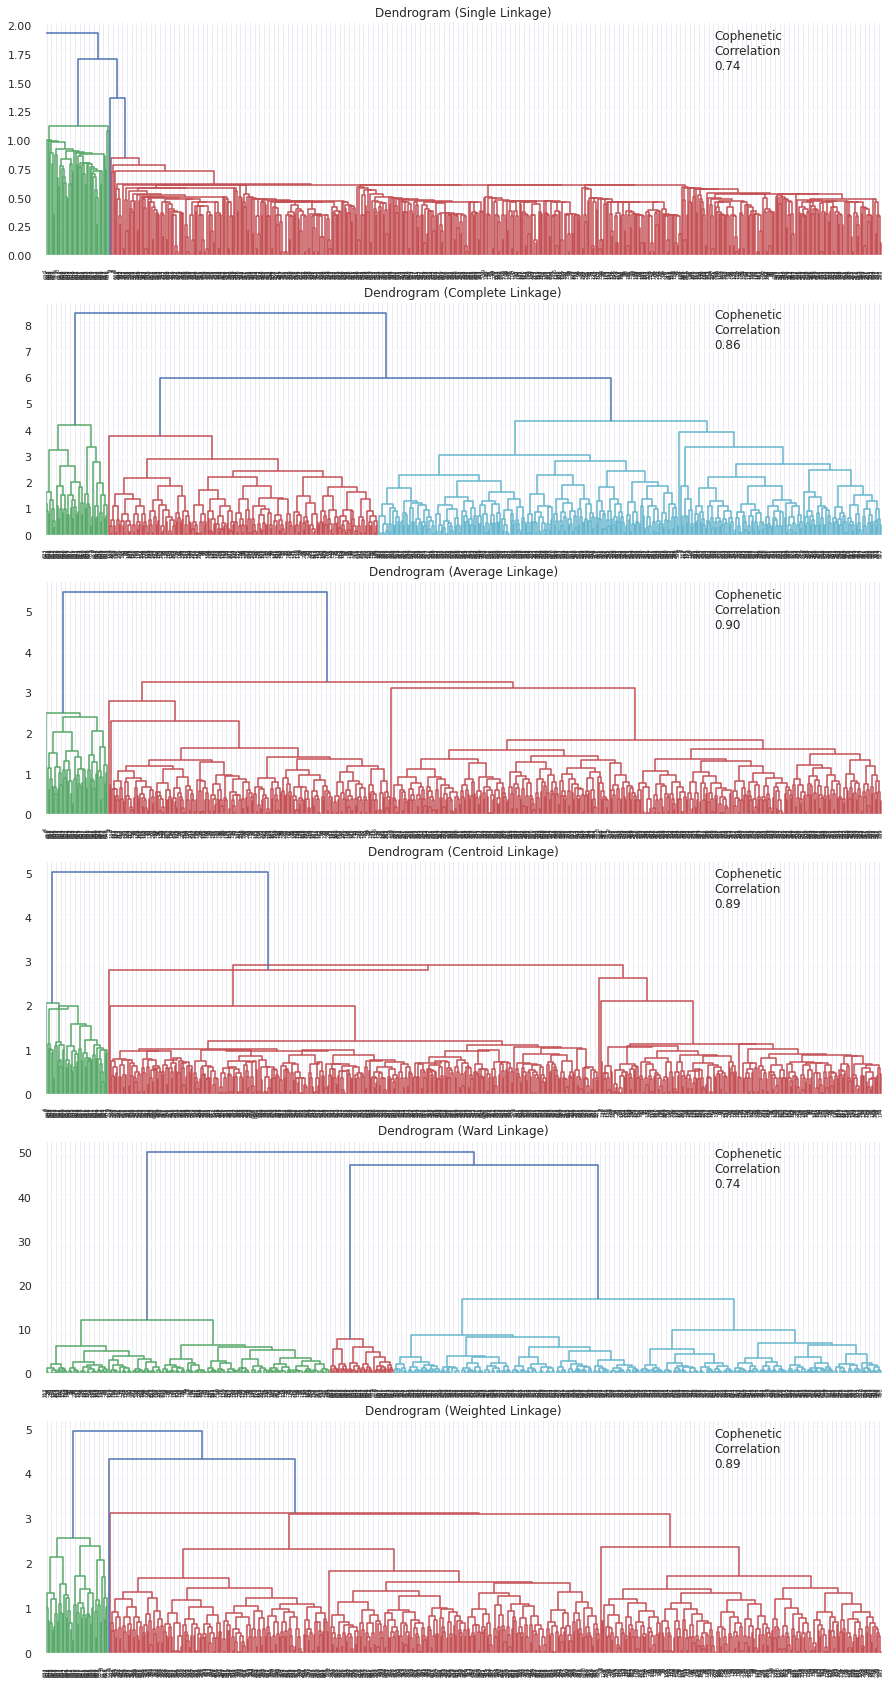

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(dfScaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(dfScaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

### Apply Hierachical Clustering and Append the Segments

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(dfScaled2)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [ ]:
dfScaled2["HC_Segments"] = HCmodel.labels_

### Cluster Profiling

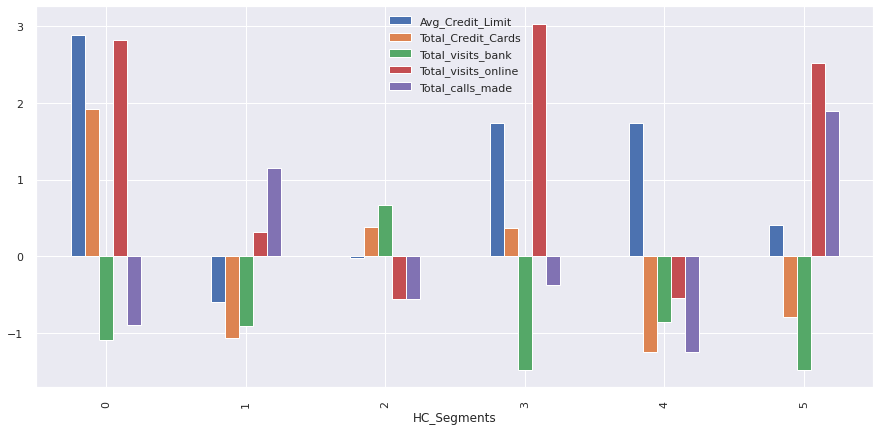

In [ ]:
dfScaled2.groupby("HC_Segments").mean().plot.bar(figsize=(15, 7))

## K-Means vs Hierarchical Clustering

* The k-means clustering method segments customers into three narrow categories divided among the medium of how customers reach out to the bank for resolution of their issues or help with the their accounts. What can be drawn from this is that there is higher interaction online with customers who have more cards and thus have a higher average credit limit. 

* With hierarchical clustering, the customer base becomes more finely segmented and nuanced. There appears to be customers who have high limits and more cards that rarely contact the bank by phone or in-person visits, but also those who have high limits and more cards who often call the bank as well. Additionally, it captures those customers who have very few interactions with the bank at all, but still use credit cards and other banking services. This nuance can be important, especially when considering the customers who may be more passive in their banking experience and those who may be more active. For example, some customer rarely interact with the bank at all. Likewise, some may use the online platform often, but find themselves having to call the bank for technical support issues, perhaps. 

## Actionable Insights & Business Recommendations

* Customers who are clustered among those with high online engagement and high call volume may be finding problems with the online platform. To improve the customer experience, technical issues and online issues will need to be improved upon to increase the customer satisfaction with the online experience, especially for those who have higher credit limits and more open accounts. 

* There are also customers who do not have a lot of cards or high limits that still find themselves calling in to the bank presumably to resolve issues they intended to figure ot on their own. This may also indicate that customers are having issues with the online platform that need to be resolved. 

* There are customer segments which can help to expand the portfolio as well. Some customers have high limits, good enganement, and few credit accounts. Since the limits on their current accounts are so high, a new product can be introduced which helps to either limit their credit exporsure and increase their number of accounts, or porvide a means to expand their current credit with incentive offers. With this type of initiative the bank can increase the number of accounts and help customers leverage their existing credit worthiness to make purchases they otherwise couldn't make. 